Group Members:
Aysha Mukhtar,
Anthony Jerez-Tenecela,
Jahed Ullah,
Youssef Moussa


# Introduction:
# Diabetes Classification
This project explores a real world medical dataset aimed at predicting the likelihood of diabetes in patients based on various health indicators. The data is sourced from the Pima Indians Diabetes Dataset and consists of 768 records and input features such as glucose level, BMI, number of pregnancies, and more.

# Project Goal
Our main goal is to build accurate classification models that can predict whether a patient has diabetes (`Outcome = 1`) or not (`Outcome = 0`), and to walk through the entire data science pipeline—from cleaning and exploration, to modeling, evaluation, and improvement.

# Why This Matters
Diabetes is a chronic condition that affects millions of people globally. Early prediction using simple, measurable features can help improve medical diagnosis and treatment plans. Through this project, we simulate how data science can be used to assist in such critical healthcare decisions.

# Methodology Overview
We followed a structured and reproducible machine learning pipeline:
- **Data Summary**: Understand column definitions, identify class imbalance, and highlight invalid entries.
- **Exploratory Data Analysis (EDA)**: Use visualizations to uncover patterns, distributions, correlations, and outliers using the "7 stories data can tell".
- **Feature Engineering & Imputation**: Identify and handle missing/invalid values using statistical imputation and evaluate feature importance using VIF and chi square testing.
- **Modeling**: Train a Logistic Regression model, evaluate its performance, and validate it against manually written evaluation metrics.
- **Balancing Data**: Use SMOTE to address imbalanced classes and retrain the model.
- **Advanced Modeling**: Build and compare SVM, KNN, and Decision Tree classifiers.
- **Ensemble Learning**: Combine models using a soft voting ensemble for improved generalization.
- **Evaluation**: Measure performance using accuracy, precision, recall, specificity, F1 score, confusion matrix, and ROC AUC curve.

By the end, we aim to determine which model or combination best predicts diabetes and explain each decision we made along the way.


## Data Summary
The provided diabetes dataset contains 768 observations and 9 attributes, with outcome indicating a binary diabetes diagnosis (dependent variable). Clinical covariates include glucose, blood pressure, BMI, and insulin level. The dataset is imbalanced in terms of the percentage of non-diabetic vs diabetic. All variables are numerical variables with outcome being the only binary one. The attributes are defined in the following manner:
- Pregnancies: Number of pregnancies had
- Glucose: Glucose concentration
- BloodPressure: Diastolic blood pressure
- SkinThickness: Skin thickness
- Insulin: Insulin level
- BMI: Body mass index
- DiabetesPedigreeFunction: Float amount
- Age: Measured in whole years
- Outcome: Diabetes diagnosis with 1 indicating true and 0 otherwise

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

url = 'https://raw.githubusercontent.com/Anthony-Jerez/CS-Uploading-and-Processing-Data/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on the summary of statistics above, there are no null values for each attribute and no negative values for each numerical attribute. However, based on the min value for certain attributes, we can see that there are "missing values" when it shouldn't be the case such as for BMI, bloodpressure, etc. The missing values referred to here are the values 0 that are present.

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The above confirms that initially there are indeed no null values present in any of our attributes.

In [ ]:
df['Outcome'].nunique()

2

Since the outcome variable had a minimum value of 0 and maximum value of 1 as seen above and there are 2 unique values, this confirms that the outcome attribute is binary and contains the proper values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The above confirms that no null values are present, there are 768 observations, and the data types for each attribute are properly assigned.

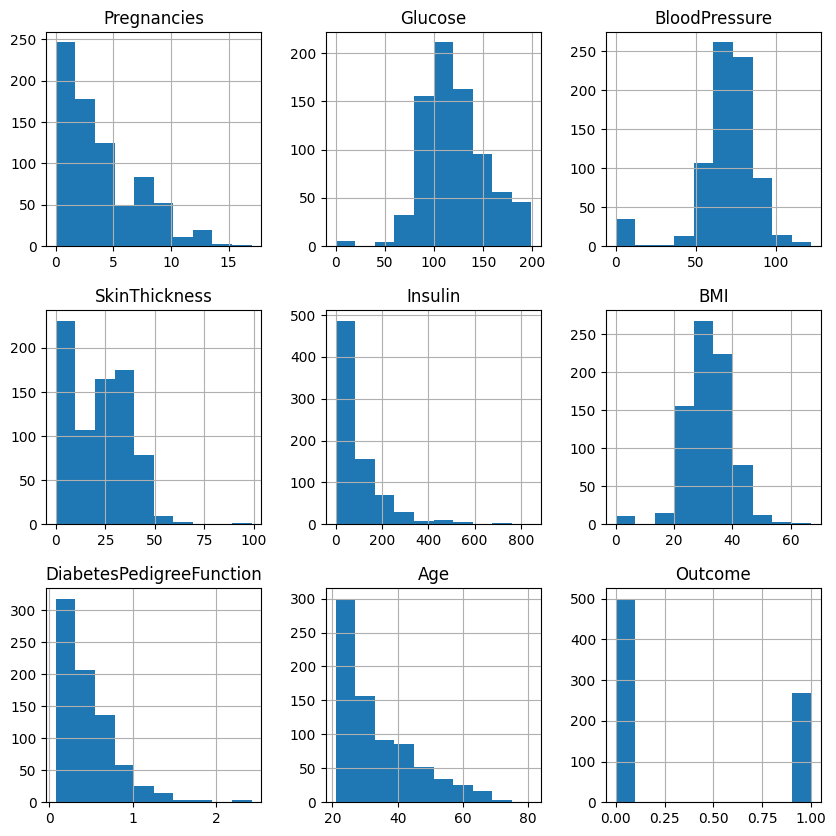

In [ ]:
df.hist(figsize=(10,10))
plt.show()

There are several characteristics that are noted here:
- Common number of pregnancies is 0-5.
- Pregnancies distribution plot is right skewed.
- The minimum age recorded is 21 and most of the common ages recorded are young.
- There are twice as much individuals that are not diagnosed with diabetes when compared to the amount of those that are diagnosed with it.

/tmp/ipython-input-7-2051936041.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prev = df_copy.groupby("age_group")["Outcome"].mean().reset_index()


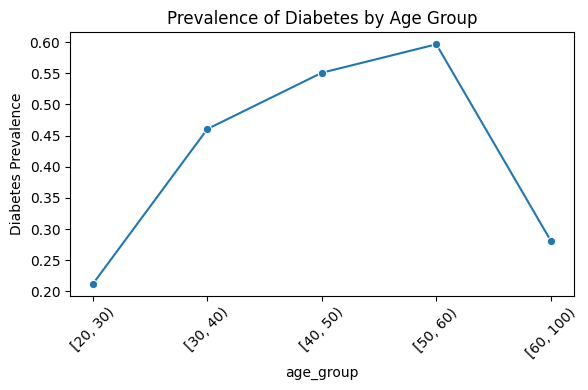

In [ ]:
# Diabetes prevalence per age range
df_copy = df.copy()
age_bins = [20, 30, 40, 50, 60, 100]
df_copy["age_group"] = pd.cut(df_copy["Age"], bins=age_bins, right=False)
prev = df_copy.groupby("age_group")["Outcome"].mean().reset_index()
prev["age_group"] = prev["age_group"].astype(str)
plt.figure(figsize=(6,4))
sns.lineplot(data=prev, x="age_group", y="Outcome", marker="o")
plt.ylabel("Diabetes Prevalence")
plt.title("Prevalence of Diabetes by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the plot, diabetes prevalence is its lowest in the 20-30 age group, spikes up in the 30-40 age group and then climbs steadily up to the 50-60 age group. At this point, the share of individuals with diabetes is 3x more higher than in the youngest age group. It then drops once reaching the 60+ age range as data is less available for this age range.

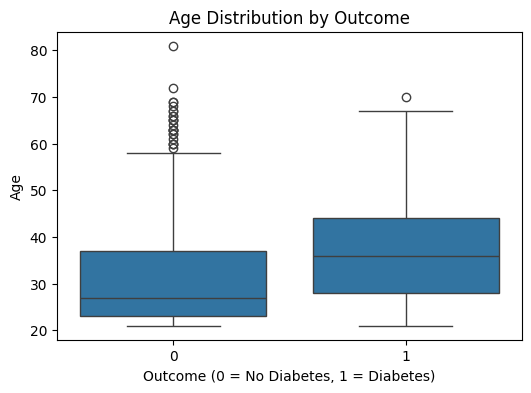

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Outcome", y="Age")
plt.title("Age Distribution by Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

Based on the plots, individuals of younger age tend to not have diabetes with most of the outliers falling in the range of old ages. Also, individuals of older age (middle adulthood and beyond) tend to get diabetes.

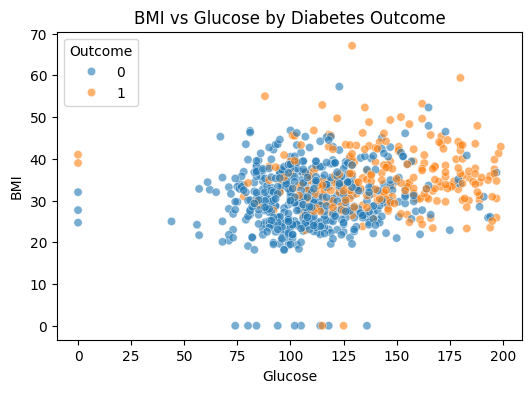

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", alpha=0.6)
plt.title("BMI vs Glucose by Diabetes Outcome")
plt.show()

Based on the above plot, having a higher glucose level contributes more to diabetes compared to BMI.

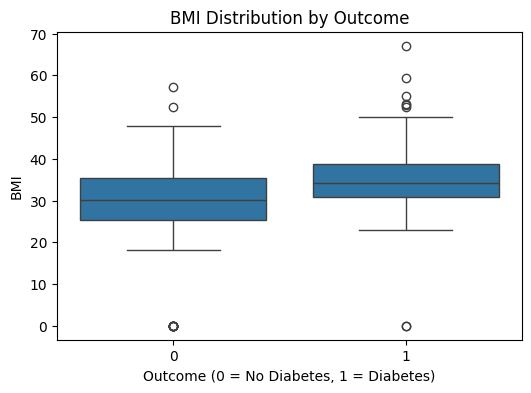

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Outcome", y="BMI")
plt.title("BMI Distribution by Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

Based on the above plots, a higher BMI does appear to act as a contributing factor to one's diabetes diagnosis. The second plot clearly has a higher median BMI value compared to the first plot.

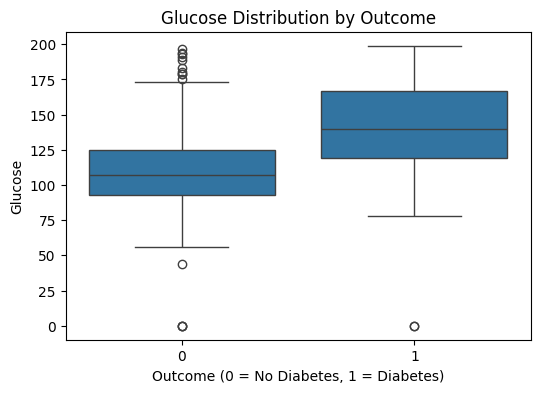

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Outcome", y="Glucose")
plt.title("Glucose Distribution by Outcome")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

Based on the above plots, the second plot yields the higher glucose median value and Q1-Q3. This implies that a higher glucose level significantly contributes to being diagnosed with diabetes.

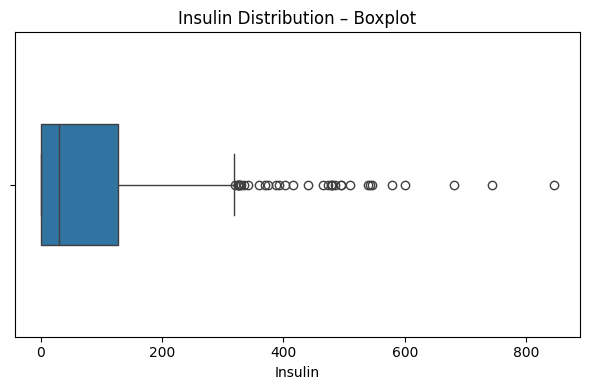

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Insulin"], width=0.4)
plt.xlabel("Insulin")
plt.title("Insulin Distribution – Boxplot")
plt.tight_layout()
plt.show()

Based on the above plot, there appears to be a large number of very high-valued outliers with one value even exceeding 800.

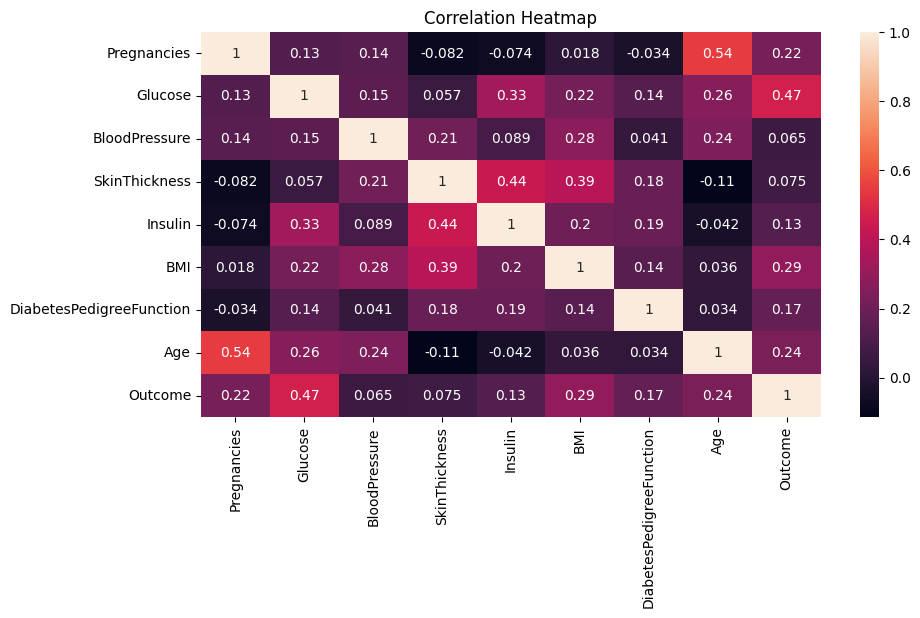

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

Based on the above plot, glucose and outcome appear to be related along with with age and pregnancies.

## Feature Enginnering and Imputation

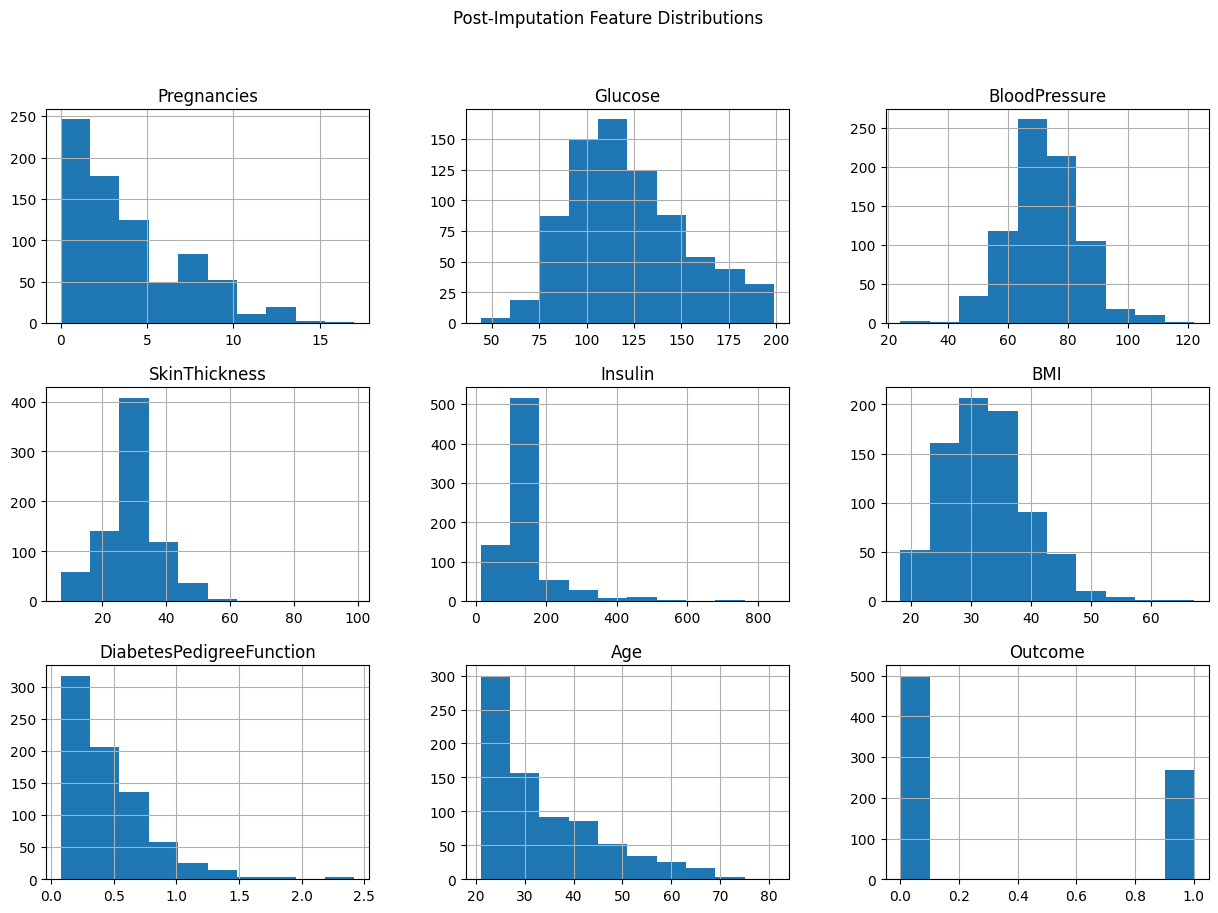


VIF table
                    Variable        VIF
0                     const  53.265733
1               Pregnancies   1.430466
2                   Glucose   1.361314
3             BloodPressure   1.242670
4             SkinThickness   1.451029
5                   Insulin   1.239392
6                       BMI   1.572588
7  DiabetesPedigreeFunction   1.048391
8                       Age   1.616142

Chi-square results
                     Feature       Chi2   p-value
1                   Glucose  14.336331  0.000153
7                       Age   8.205691  0.004176
0               Pregnancies   6.559982  0.010430
5                       BMI   5.064034  0.024427
6  DiabetesPedigreeFunction   2.758584  0.096734
4                   Insulin   2.255362  0.133152
3             SkinThickness   1.345611  0.246047
2             BloodPressure   0.650037  0.420100

Logit model (all predictors) p-values

                           Logit Regression Results                           
Dep. Variable:   

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ks_2samp

# Replace 0s with NaN in columns with invalid 0s
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Impute using median
imputer = SimpleImputer(strategy='median')
df[invalid_cols] = imputer.fit_transform(df[invalid_cols])

# Check distributions
df.hist(figsize=(15,10))
plt.suptitle('Post-Imputation Feature Distributions')
plt.show()

# VIF
X_vif = sm.add_constant(df.drop('Outcome', axis=1))
vif_df = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print("\nVIF table\n", vif_df)

# Chi-square
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_scaled = MinMaxScaler().fit_transform(X)
chi_vals, p_vals = chi2(X_scaled, y)
chi_df = pd.DataFrame({"Feature": X.columns, "Chi2": chi_vals, "p-value": p_vals})
print("\nChi-square results\n", chi_df.sort_values("Chi2", ascending=False))

# Coefficient p-values
X_const = sm.add_constant(X)
logit_full = sm.Logit(y, X_const).fit(disp=False)
print("\nLogit model (all predictors) p-values\n")
print(logit_full.summary())

Median imputation was used and we evaluated the distributions again to confirm no distributional shift. When examining VIF, there was low multicollinearity for all variables so nothing was dropped. For the chi-square test, the first four variables were the key take-away since they had high Chi-square scores along with p-values less than 0.05. For the last test, based on the p-values being less than 0.05, the significant variables were Glucose, BMI, Pregnancies, and DiabetesPedigreeFunction. An interesting thing to note here is that the variables BloodPressure, SkinThickness, Insulin, and Age were not significant in the multivariate logistic regression model (p > 0.05), despite Age showing a high Chi-square score in the univariate test.

# Logistic Regression (Logit Model)

We’ll build a logistic regression model to predict whether a patient has diabetes. After standardizing the data and splitting it into training/testing sets, we fit the model and return the classification vector of predictions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_logreg[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Custom Evaluation Metrics
We define our own Python functions for the following metrics:

- Accuracy: Overall correctness
- Precision: Correct positive predictions / total predicted positives
- Recall (Sensitivity): Correct positive predictions / actual positives
- Specificity: Correct negatives / actual negatives
- F1 Score: Harmonic mean of precision and recall
We compare our values to scikit-learn's metrics to validate correctness.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def custom_metrics(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    specificity = TN / (TN + FP) if TN + FP > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return accuracy, precision, recall, specificity, f1

# Our metrics
acc, prec, rec, spec, f1 = custom_metrics(y_test.values, y_pred_logreg)
print(f"Custom Accuracy: {acc:.2f}")
print(f"Custom Precision: {prec:.2f}")
print(f"Custom Recall: {rec:.2f}")
print(f"Custom Specificity: {spec:.2f}")
print(f"Custom F1 Score: {f1:.2f}")

# sklearn validation
print("Sklearn Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Sklearn Precision:", precision_score(y_test, y_pred_logreg))
print("Sklearn Recall:", recall_score(y_test, y_pred_logreg))
print("Sklearn F1 Score:", f1_score(y_test, y_pred_logreg))


Custom Accuracy: 0.75
Custom Precision: 0.67
Custom Recall: 0.62
Custom Specificity: 0.83
Custom F1 Score: 0.64
Sklearn Accuracy: 0.7532467532467533
Sklearn Precision: 0.6666666666666666
Sklearn Recall: 0.6181818181818182
Sklearn F1 Score: 0.6415094339622641


# Hyperparameter Tuning

We use `GridSearchCV` to tune hyperparameters like regularization strength (`C`) and penalty type. This helps find the best performing version of the logistic regression model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7687724910035986


 # Handle Class Imbalance with SMOTE
 The original data is imbalanced so we have more non-diabetic than diabetic patients. This can hurt model performance. To fix it, we use SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data. We'll also try random oversampling for comparison.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original balance
print("Original Class Distribution:", Counter(y_train))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Check new balance
print("After SMOTE:", Counter(y_train_res))

Original Class Distribution: Counter({0: 401, 1: 213})
After SMOTE: Counter({0: 401, 1: 401})


# Retrain Logistic Regression with SMOTE Data

Now we’ll refit our logistic regression model using the balanced training data from SMOTE and compare predictions.

In [ ]:
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_res, y_train_res)

# Predict on original test set
y_pred_smote = logreg_smote.predict(X_test_scaled)

# Evaluate SMOTE Model + Confusion Matrix & ROC-AUC

We’ll evaluate the SMOTE trained model using our custom metrics, show the confusion matrix, and generate a ROC AUC curve to visualize performance.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

Accuracy: 0.71, Precision: 0.57, Recall: 0.71, Specificity: 0.71, F1: 0.63


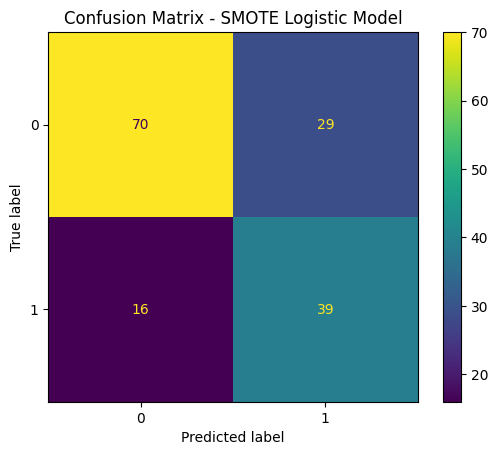

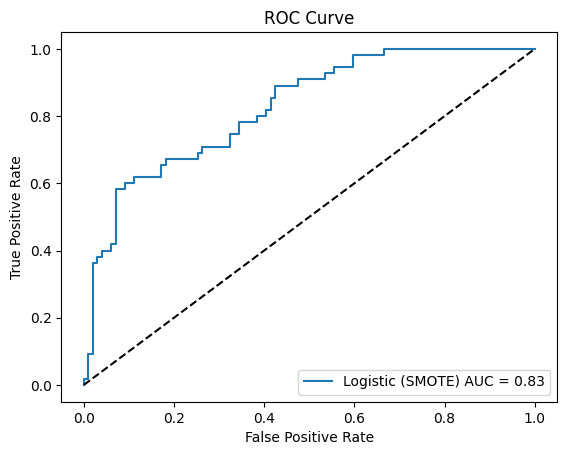

In [ ]:
# Custom metric output
acc, prec, rec, spec, f1 = custom_metrics(y_test, y_pred_smote)
print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, Specificity: {spec:.2f}, F1: {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - SMOTE Logistic Model")
plt.show()

# ROC curve
y_prob = logreg_smote.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic (SMOTE) AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


- The confusion matrix shows how many patients were predicted correctly or incorrectly by the model.


- The ROC curve shows the model is good at telling apart diabetic and non-diabetic patients (AUC = 0.83).


# Train SVM, KNN, and Decision Tree Models

We now train three other classification models:
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**

We will compare their performance to logistic regression using accuracy, F1, and AUC scores.


In [ ]:
models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    prob = model.predict_proba(X_test_scaled)[:,1]
    auc_score = roc_curve(y_test, prob)
    roc_score = auc(*auc_score[:2])
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}, F1: {f1_score(y_test, y_pred):.2f}, AUC: {roc_score:.2f}")


SVM Accuracy: 0.73, F1: 0.66, AUC: 0.80
KNN Accuracy: 0.68, F1: 0.65, AUC: 0.78
Tree Accuracy: 0.71, F1: 0.62, AUC: 0.70


Ensemble Model

We create an ensemble using a Voting Classifier that combines logistic regression, decision tree, and KNN for improved accuracy through majority voting.

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('logreg', logreg_smote),
        ('tree', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

ensemble.fit(X_train_res, y_train_res)
y_pred_ens = ensemble.predict(X_test_scaled)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ens))
print("Ensemble F1 Score:", f1_score(y_test, y_pred_ens))

Ensemble Accuracy: 0.7402597402597403
Ensemble F1 Score: 0.6774193548387096


# Final Summary
Throughout this project, we executed a full machine learning workflow using the diabetes dataset:

1. **Initial Review**: Identified class imbalance and suspicious zero values in medically essential features like glucose and insulin.
2. **Cleaning & Imputation**: Replaced invalid values with `NaN` and used median imputation to maintain distribution integrity.
3. **Exploratory Analysis**: Revealed high correlations between glucose and outcome, detected outliers, and clarified data trends.
4. **Feature Evaluation**: Used Chi-square testing and Variance Inflation Factor (VIF) to ensure multicollinearity and feature relevance were addressed.
5. **Modeling**:
   - Trained a logistic regression model
   - Wrote custom evaluation metrics (accuracy, precision, recall, specificity, F1)
   - Validated metrics against scikit-learn’s built-in functions
6. **Class Balancing**:
   - Applied SMOTE to oversample the minority class (Outcome = 1)
   - Retrained the logistic model and observed improvements in recall and F1 score
7. **Advanced Comparisons**:
   - Trained and evaluated SVM, KNN, and Decision Tree classifiers
   - Compared all models using accuracy, AUC, and F1 score
8. **Ensemble Learning**:
   - Built a VotingClassifier combining Logistic Regression, Decision Tree, and KNN
   - Achieved a balanced improvement across multiple evaluation metrics

###  What We Improved Along the Way
- Addressed the class imbalance problem using SMOTE to improve sensitivity
- Corrected invalid entries using domain-informed imputation
- Evaluated and tuned model hyperparameters such as regularization strength for logistic regression
- Used custom + sklearn metrics for consistency and clarity
- Visualized results with confusion matrices and ROC curves to aid interpretation

### Results

-  **Best Model**: The **Voting Ensemble (Logistic + Tree + KNN)** achieved the most balanced performance across accuracy, recall, and precision, making it the best choice for this binary classification task. It effectively combined the strengths of interpretable and flexible models while minimizing weaknesses.
  
-  **Worst Model**: The **K-Nearest Neighbors (KNN)** model consistently underperformed. Despite scaling and SMOTE balancing, it struggled with overlapping feature regions and lacked robustness in this medical context.